In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
import os

In [ ]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423

In [ ]:
pip install imgaug


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install ipyplot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 16.0 MB/s 


In [ ]:
pip install ipyplot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import req. lib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)


compo

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

In [44]:
import pathlib
data_dir=pathlib.Path("/content/flowers")
data_dir

PosixPath('/content/flowers')

Fetching no of images in dataset



In [45]:
len(list(data_dir.glob('*/*.jpg')))


4317

Loading images under its image names as dictionary



In [46]:
flower_images={
    'roses' : list(data_dir.glob('roses/*.jpg')),
    'tulips': list(data_dir.glob('tulips/*.jpg')),
    'dandelin':list(data_dir.glob('dandelin/*.jpg')),
    'sunflowers':list(data_dir.glob('sunflowers/*.jpg')),
    'daisy':list(data_dir.glob('daisy/*.jpg'))
}

Assigning Labels for the names



In [47]:
flower_labels={
    'roses':0,
    'tulips':1,
    'dandelin':2,
    'sunflowers':3,
    'daisy':4
}

Creating images list and its output label list



In [48]:
x,y=[],[]
for flower_name,images in flower_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flower_labels[flower_name])


In [49]:
x = np.array(x)
y = np.array(y)

Splitting Training and Testing Data



In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

Scaling - Preprocessing



In [51]:
X_train_scaled = x_train / 255
X_test_scaled = x_test / 255


Image Augmentation



In [52]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"
                                                 ),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)

Original image and its augmented image



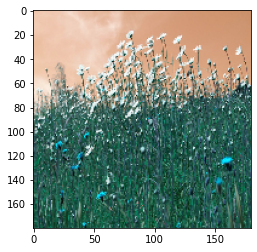

In [53]:
plt.imshow(x[0])

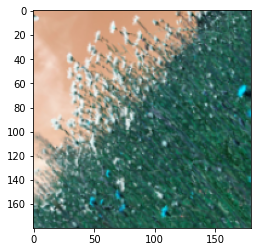

In [54]:
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))


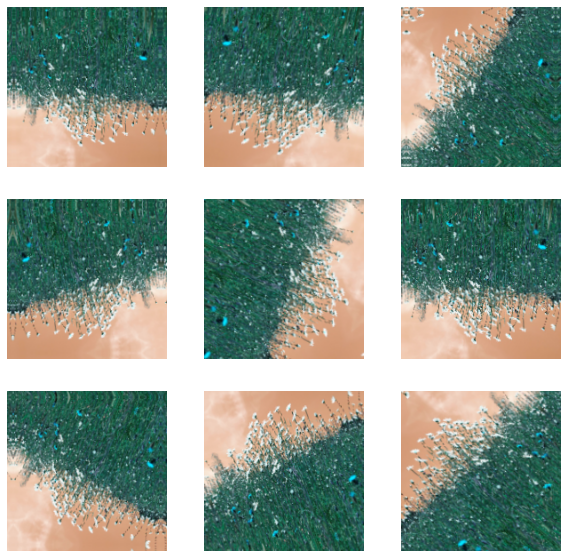

In [56]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(x)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

In [58]:
num_classes = 5

model = keras.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
18/18 [==============================] - 26s 1s/step - loss: 0.0873 - accuracy: 0.9616
Epoch 2/5
18/18 [==============================] - 21s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
18/18 [==============================] - 21s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
18/18 [==============================] - 21s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
18/18 [==============================] - 21s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000


Model Creation



In [68]:
num_classes = 5

model = keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


Compilation of model



In [62]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train a model



In [63]:
model.fit(X_train_scaled, y_train, epochs=5)


Epoch 1/5
18/18 [==============================] - 19s 1s/step - loss: 0.0940 - accuracy: 0.9442
Epoch 2/5
18/18 [==============================] - 19s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
18/18 [==============================] - 20s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
18/18 [==============================] - 18s 991ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
18/18 [==============================] - 17s 969ms/step - loss: 0.0000e+00 - accuracy: 1.0000


Saving model



In [64]:
import joblib as jbl


In [65]:
filename = "Completed_model.pkl"
jbl.dump(model, filename)

['Completed_model.pkl']

Load model



In [66]:
model=jbl.load("Completed_model.pkl")


Model Evaluation



In [67]:
model.evaluate(X_test_scaled,y_test)


6/6 [==============================] - 2s 313ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]